In [2]:
import pandas as pd

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [8]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

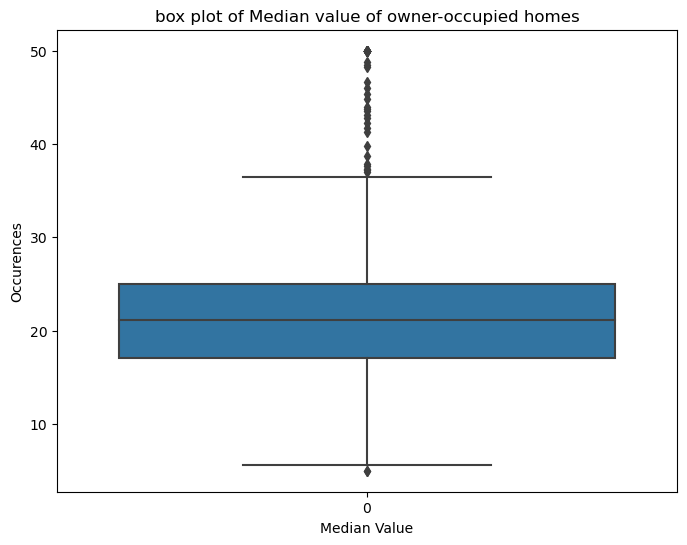

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(data = boston_df['MEDV'])
plt.title('box plot of Median value of owner-occupied homes')
plt.xlabel('Median Value')
plt.ylabel('Occurences')
plt.show()

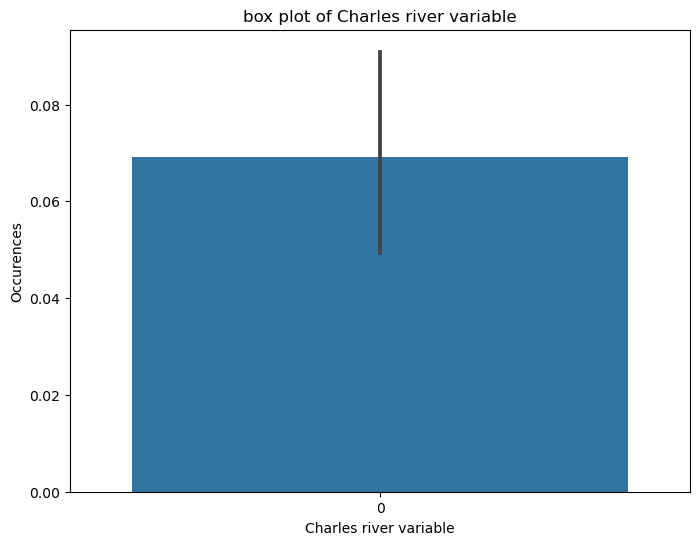

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(data=boston_df['CHAS'])
plt.title('box plot of Charles river variable')
plt.xlabel('Charles river variable')
plt.ylabel('Occurences')
plt.show()

In [40]:
boston_df['age_group'] = boston_df['AGE'].apply(lambda x: "70y and older" if x >= 70 else "between 70 and 35")

In [30]:
boston_df.loc[boston_df['AGE']<=35,['age_group']] = "35y and younger"

In [32]:
boston_df['age_group'].unique()

array(['between 70 and 35', '70y and older', '35y andyounger'],
      dtype=object)

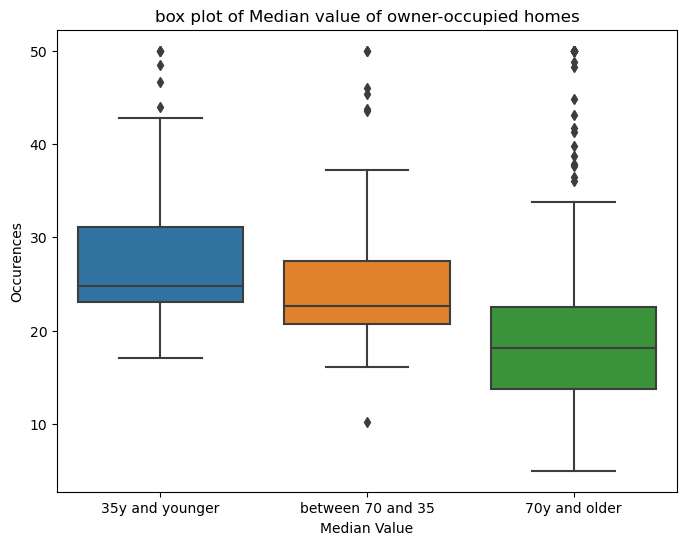

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(x= boston_df['age_group'] , y=boston_df['MEDV'], order=['35y and younger','between 70 and 35', '70y and older'])
plt.title('box plot of Median value of owner-occupied homes')
plt.xlabel('Median Value')
plt.ylabel('Occurences')
plt.show()

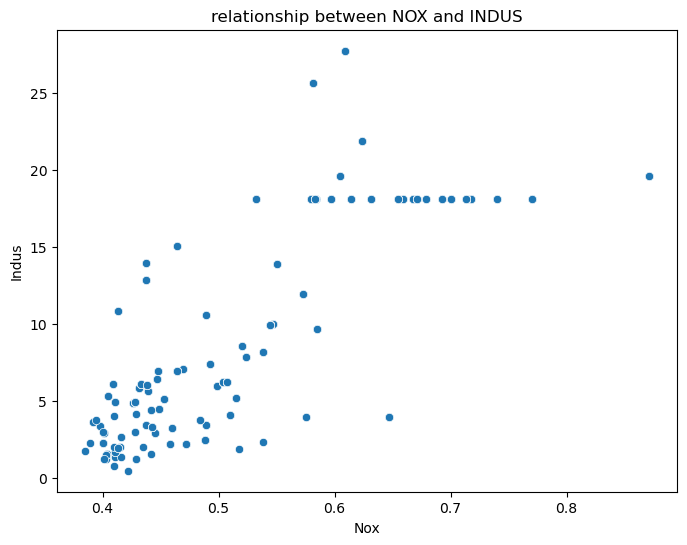

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x= boston_df['NOX'] , y=boston_df['INDUS'])
plt.title('relationship between NOX and INDUS')
plt.xlabel('Nox')
plt.ylabel('Indus')
plt.show()

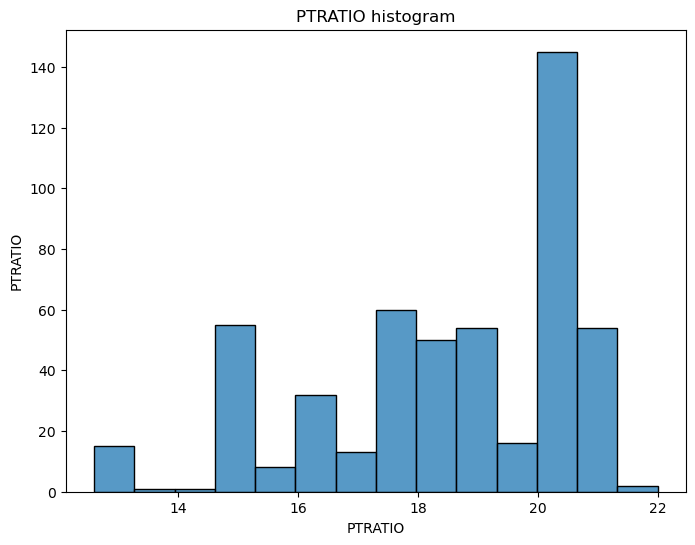

In [48]:
 
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'])
plt.title('PTRATIO histogram')
plt.ylabel('PTRATIO')
plt.show()

In [54]:
from scipy.stats import *

In [ ]:
'''
State your hypothesis


Null hypothesis: μ1 = μ2 ("there is no difference in evaluation scores for male and females")


Alternative hypothesis: μ1 μ2 ("there is a difference in evaluation scores between male and females")

alpha (a) level = 0.05


'''

In [61]:
ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [ ]:
'''

Since the p_value is lower than alpha (0,05), we reject the null hypothesis as theres enough evidence that there is a statistical difference in MEDV evaluations based on CHAS

'''

In [64]:
f_oneway(boston_df[boston_df['age_group']=='35y and younger']['MEDV'],boston_df[boston_df['age_group']=='between 70 and 35']['MEDV'],boston_df[boston_df['age_group']=='70y and older']['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

In [ ]:
'''

Since the p_value is lower than alpha (0,05), we reject the null hypothesis as theres enough evidence that there is a statistical difference in MEDV evaluations based on age_group

'''

In [67]:
pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

In [ ]:
'''

Since the p_value is lower than alpha (0,05), we reject the null hypothesis as theres enough evidence that there is a statistical difference in MEDV evaluations based on NOX

'''

In [79]:
import statsmodels.api as sm

X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        21:06:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''

Since the p_value is lower than alpha (0,05), we reject the null hypothesis as theres enough evidence that there is a statistical difference in DIS evaluations based on age_group

'''